In [1]:
import numpy as np
import pandas as pd
import os
import glob
%matplotlib notebook
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
# Load labels for control/depressed

labels_file = '/cnl/abcd/data/labels/baseline_depr_sex_age_hand.csv' 
labels = pd.read_csv(labels_file, index_col = 0)
labels

,sex,age,hand,depress_dsm5
NDARINV08FUB58A,F,118,R,0
NDARINV04GAB2AA,F,130,R,0
NDARINV09AEBLZH,F,119,R,0
NDARINV0GZM9UZJ,F,118,R,0
NDARINV0N10CEEL,F,130,R,0
...,...,...,...,...
NDARINVXN6HMGK8,M,120,R,0
NDARINVXRP6TZGT,M,112,R,0
NDARINVXFVACT0F,M,110,R,0
NDARINVX718NUYK,M,120,R,0


In [10]:
# List all the available FC files
# file_name options can be: subc_Cov, subc_DDC, subc_Reg_DDC

fc_dir = '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/'
file_name = 'subc_Cov**.csv'

files = glob.glob(fc_dir+'**/'+file_name, recursive=True)

In [126]:
files

['/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0BAVEL0T/single_sessions/subc_DDC_run-02.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0BAVEL0T/single_sessions/subc_DDC_run-03.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0BAVEL0T/single_sessions/subc_DDC_run-01.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0BAVEL0T/single_sessions/subc_DDC_run-04.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0N10CEEL/single_sessions/subc_DDC_run-01.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0N10CEEL/single_sessions/subc_DDC_run-02.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0N10CEEL/single_sessions/subc_DDC_run-03.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV0N10CEEL/single_sessions/subc_DDC_run-04.csv',
 '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/sub-NDARINV00U

In [11]:
control=[]
depressed=[]

for f in files:

    # check if subject is part of our list
    if f.split('/')[-3].split('-')[-1] in labels.index.values:
    
        # check if subject is a control 0 or depressed 1
        if labels['depress_dsm5'].values[np.where(labels.index.values==f.split('/')[-3].split('-')[-1])]==0:
            fc = np.loadtxt(f, delimiter=",", dtype=float)
            control.append(fc)

        else:
            fc = np.loadtxt(f, delimiter=",", dtype=float)
            depressed.append(fc)

control=np.asarray(control)
depressed=np.asarray(depressed)

In [5]:
np.shape(control)

(1629, 98, 98)

From here on we use only controls but the same can be done with depressed

In [14]:
# Remove undesired areas (3rd and 4th ventricles, csf)

# Indices of rows and columns to remove
rows_to_remove = [9, 10, 14]
columns_to_remove = [9, 10, 14]

# Remove specified rows and columns
filtered_matrix = np.delete(control, rows_to_remove, axis=1)
filtered_matrix = np.delete(filtered_matrix, columns_to_remove, axis=2)

#connectivity matrices end up being 95*95 at this point
print(np.shape(filtered_matrix))

(303, 95, 95)


<IPython.core.display.Javascript object>


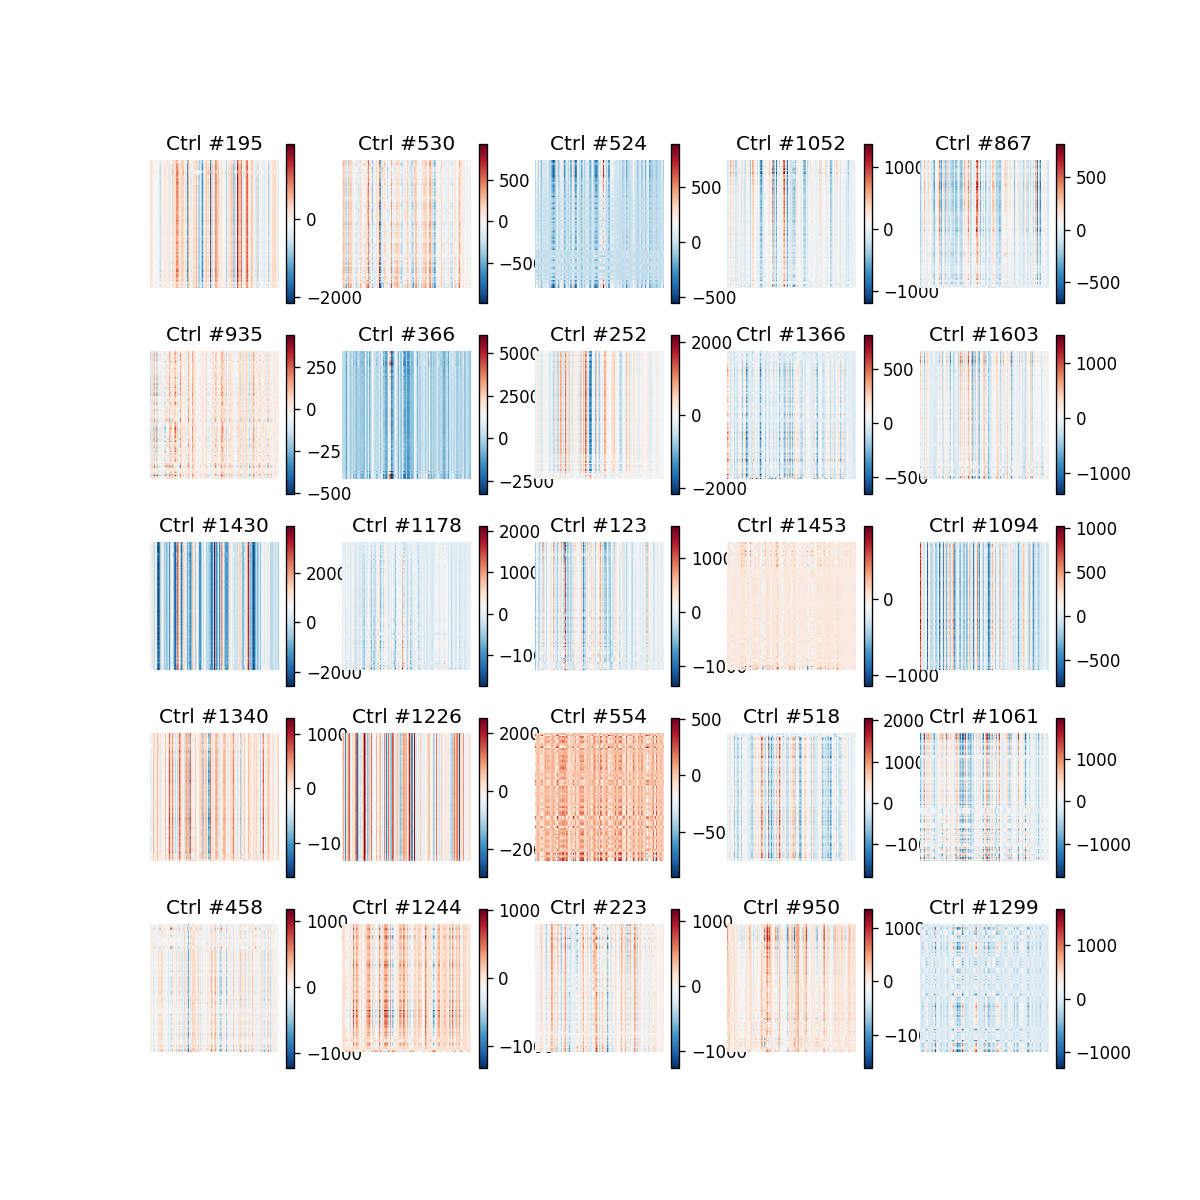

In [7]:
"""plot 25 random FC matrices"""
n = random.sample(range(len(filtered_matrix)), 25)

fig = plt.figure(figsize=(10, 10))

k = 0

for i in n:
    ax = fig.add_subplot(5, 5, k + 1)
    plt.imshow(filtered_matrix[i, :, :], cmap="RdBu_r")

    plt.colorbar()
    plt.title(f"Ctrl #{i}")

    plt.axis("off")
    k = k + 1

<IPython.core.display.Javascript object>


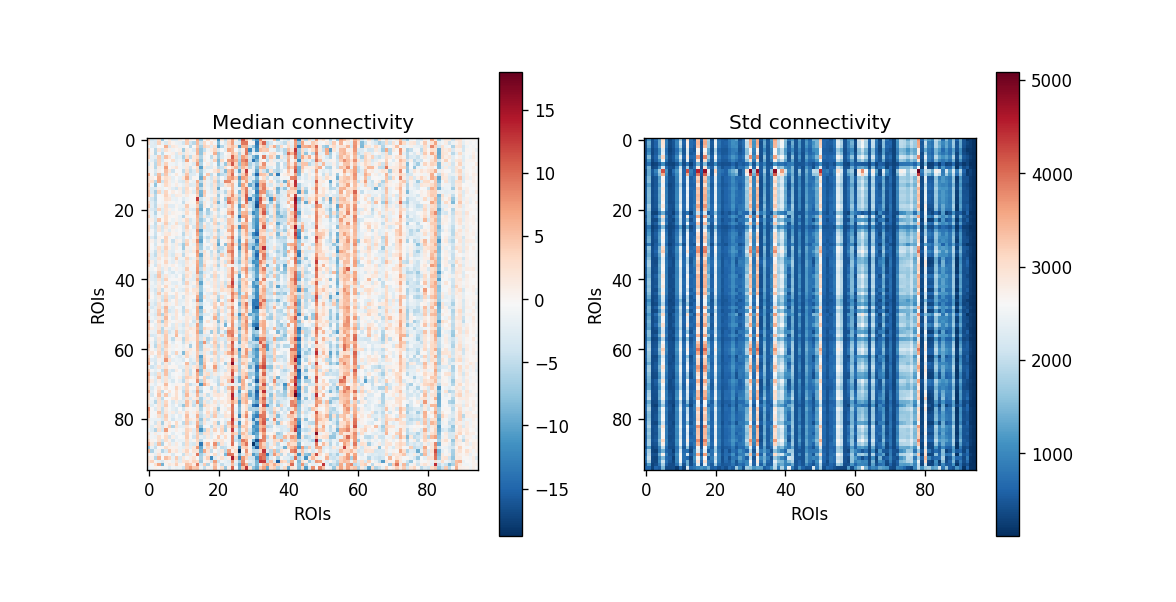

In [8]:
# Visualize the mean/median and std connectivity matrix for controls

plt.figure()
plt.subplot(121)
plt.imshow(np.nanmedian(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Median connectivity')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.nanstd(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Std connectivity')
plt.colorbar()


<IPython.core.display.Javascript object>


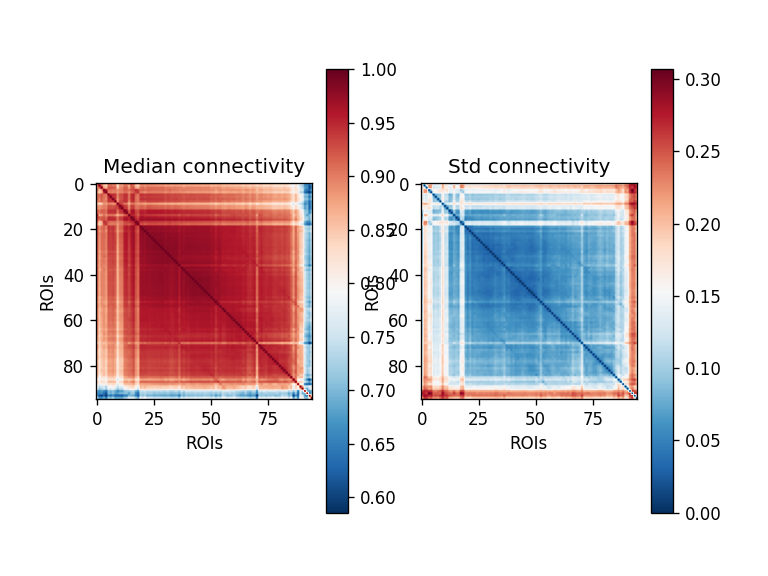

In [13]:
# Visualize the mean/median and std connectivity matrix for controls

plt.figure()
plt.subplot(121)
plt.imshow(np.nanmedian(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Median connectivity')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.nanstd(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Std connectivity')
plt.colorbar()


<IPython.core.display.Javascript object>


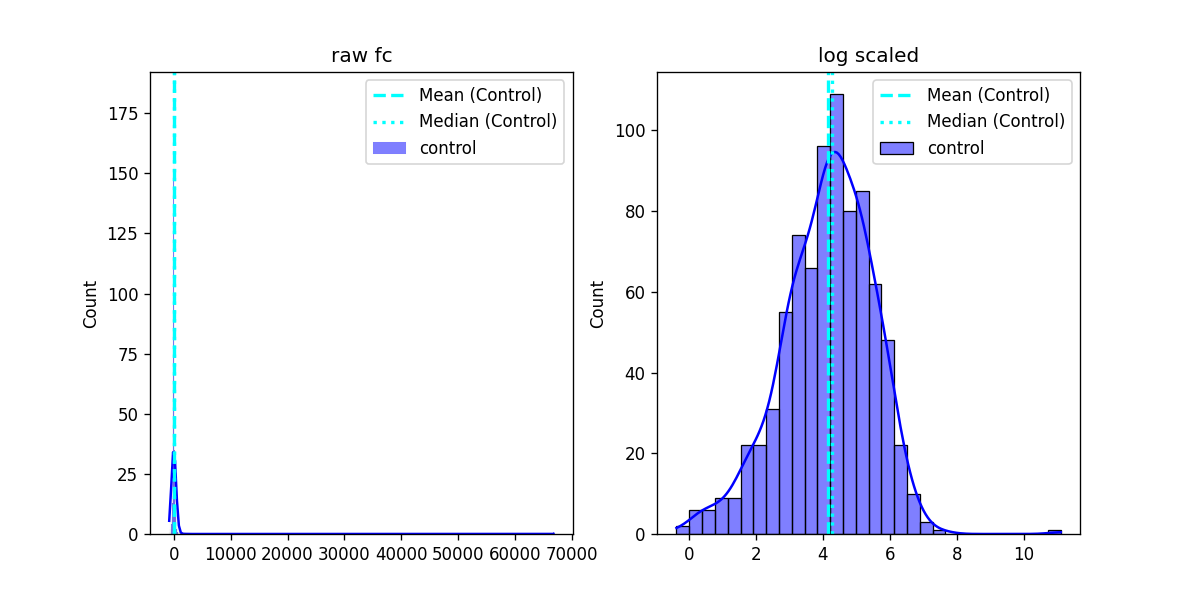

/tmp/ipykernel_85870/3343351461.py:22: RuntimeWarning: invalid value encountered in log
  sns.histplot( np.log(filtered_matrix[:, x, y]), kde=True, color='blue', label='control')
/tmp/ipykernel_85870/3343351461.py:24: RuntimeWarning: invalid value encountered in log
  mean_c = np.nanmean(np.log(filtered_matrix[:, x, y]))
/tmp/ipykernel_85870/3343351461.py:25: RuntimeWarning: invalid value encountered in log
  median_c = np.nanmedian(np.log(filtered_matrix[:, x, y]))


In [9]:
# Visualize probability distributions of specific connections x,y

#chose the connection to visualize
x=40
y=88

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot( filtered_matrix[:, x, y], kde=True, color='blue', label='control', log_scale=(False, False))

# Add mean and median vertical bars
mean_c = np.nanmean(filtered_matrix[:, x, y])
median_c = np.nanmedian(filtered_matrix[:, x, y])

plt.axvline(x=mean_c, color='cyan', linestyle='dashed', linewidth=2, label='Mean (Control)')
plt.axvline(x=median_c, color='cyan', linestyle='dotted', linewidth=2, label='Median (Control)')

plt.title('raw fc')
plt.legend()

plt.subplot(122)
sns.histplot( np.log(filtered_matrix[:, x, y]), kde=True, color='blue', label='control')

mean_c = np.nanmean(np.log(filtered_matrix[:, x, y]))
median_c = np.nanmedian(np.log(filtered_matrix[:, x, y]))

plt.axvline(x=mean_c, color='cyan', linestyle='dashed', linewidth=2, label='Mean (Control)')
plt.axvline(x=median_c, color='cyan', linestyle='dotted', linewidth=2, label='Median (Control)')

plt.title('log scaled')
plt.legend()

In [66]:
# Conver the matrices to arrays for ML = "flattening"

flattened_array = filtered_matrix.reshape(filtered_matrix.shape[0],-1)
print(np.shape(flattened_array))


(3780, 9025)


In [ ]:
# SUBTYPING!!!